In [ ]:
# Trader Behavior Insights Based on Bitcoin Market Sentiment
This project explores the relationship between crypto trader behavior and market sentiment (Fear/Greed) using historical transaction data and the Bitcoin Fear & Greed Index.


In [66]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


In [65]:
trader_df = pd.read_csv(r"C:\Users\Rishabh Giri\Downloads\historical_data.csv")
sentiment_df = pd.read_csv(r"C:\Users\Rishabh Giri\Downloads\fear_greed_index.csv")

In [5]:
print("Trader Data:")
print(trader_df.head())

Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         

In [6]:
print("\nSentiment Data:")
print(sentiment_df.head())


Sentiment Data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [7]:
#Preprocessing the dates

In [11]:
print(sentiment_df.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [13]:
print(trader_df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [15]:
print(sentiment_df.columns.tolist())


['timestamp', 'value', 'Classification', 'Date']


In [19]:
sentiment_df.columns = sentiment_df.columns.str.strip()

sentiment_df.rename(columns={
    'date': 'Date',
    'classification': 'Classification'
}, inplace=True)

sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])


In [20]:
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp'].dt.date)


In [21]:
#merging data

In [25]:
merged_df = pd.merge(trader_df, sentiment_df[['Date', 'Classification']], on='Date', how='left')

In [26]:
print(merged_df[['Date', 'Classification', 'Closed PnL']].head())

        Date Classification  Closed PnL
0 1970-01-01            NaN         0.0
1 1970-01-01            NaN         0.0
2 1970-01-01            NaN         0.0
3 1970-01-01            NaN         0.0
4 1970-01-01            NaN         0.0


In [35]:
#feature engineering

In [52]:
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], unit='ms')
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp'].dt.date)


sentiment_df.rename(columns={'date': 'Date', 'classification': 'Classification'}, inplace=True)
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])


In [53]:
merged_df = pd.merge(trader_df, sentiment_df, on='Date', how='inner')


In [54]:
merged_df['profitable'] = merged_df['Closed PnL'] > 0

merged_df['trade_direction'] = merged_df['Side'].str.capitalize()

if 'Leverage' in merged_df.columns:
    merged_df['high_leverage'] = merged_df['Leverage'] > 10
else:
    merged_df['high_leverage'] = False  # default

merged_df = merged_df.dropna(subset=['Classification', 'Size USD'])

merged_df = merged_df[merged_df['Size USD'] > 0]


In [55]:
merged_df['size_category'] = pd.cut(
    merged_df['Size USD'],
    bins=[0, 100, 1000, float('inf')],
    labels=['Small', 'Medium', 'Large']
)


In [56]:
print(merged_df[['Closed PnL', 'profitable', 'Size USD', 'size_category', 'Side', 'trade_direction', 'Classification']].head())
print(f"\n✅ Total rows after feature engineering: {len(merged_df)}")


   Closed PnL  profitable  Size USD size_category Side trade_direction  \
0         0.0       False   7872.16         Large  BUY             Buy   
1         0.0       False    127.68        Medium  BUY             Buy   
2         0.0       False   1150.63         Large  BUY             Buy   
3         0.0       False   1142.04         Large  BUY             Buy   
4         0.0       False     69.75         Small  BUY             Buy   

  Classification  
0          Greed  
1          Greed  
2          Greed  
3          Greed  
4          Greed  

✅ Total rows after feature engineering: 184220


In [47]:
print(trader_df['Timestamp'].head(10))


0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
5    1.730000e+12
6    1.730000e+12
7    1.730000e+12
8    1.730000e+12
9    1.730000e+12
Name: Timestamp, dtype: float64


In [57]:
#Visual Analysis & Insights

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

C:\Users\Rishabh Giri\anaconda3\envs\new\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


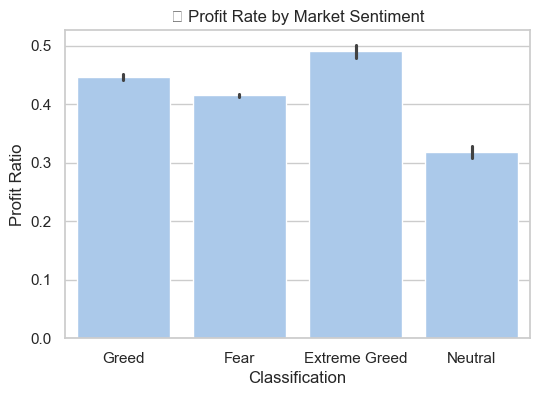

In [60]:
# 1 Profitability vs Market Sentiment
plt.figure(figsize=(6, 4))
sns.barplot(data=merged_df, x='Classification', y='profitable', estimator=lambda x: sum(x)/len(x))
plt.title("💹 Profit Rate by Market Sentiment")
plt.ylabel("Profit Ratio")
plt.show()


C:\Users\Rishabh Giri\anaconda3\envs\new\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


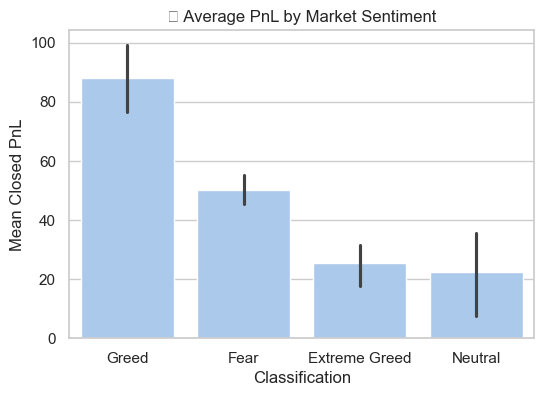

In [62]:
# 2 Average Profit/Loss by Sentiment
plt.figure(figsize=(6, 4))
sns.barplot(data=merged_df, x='Classification', y='Closed PnL')
plt.title("📈 Average PnL by Market Sentiment")
plt.ylabel("Mean Closed PnL")
plt.show()

C:\Users\Rishabh Giri\anaconda3\envs\new\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129530 (\N{BASKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


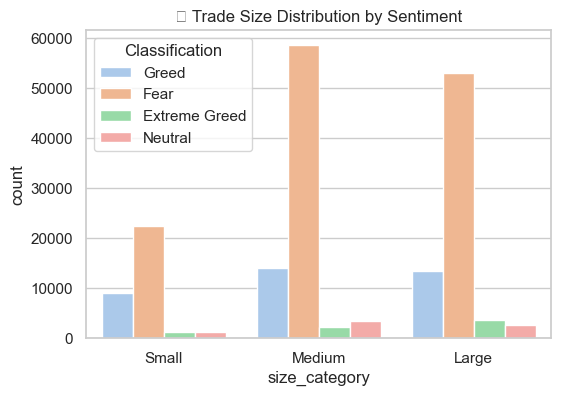

In [63]:
# Size Category vs Sentiment
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='size_category', hue='Classification')
plt.title("🧺 Trade Size Distribution by Sentiment")
plt.show()

C:\Users\Rishabh Giri\AppData\Local\Temp\ipykernel_2972\1720852516.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = merged_df.pivot_table(
C:\Users\Rishabh Giri\anaconda3\envs\new\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


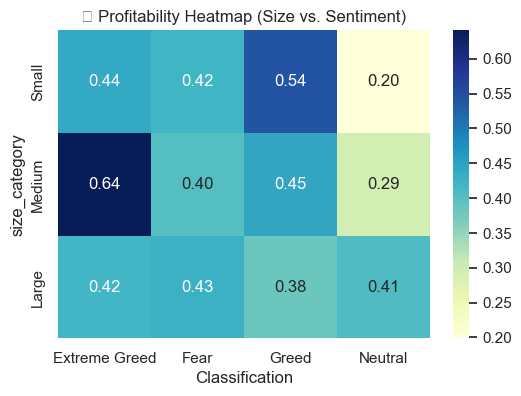

In [64]:
# Heatmap of Profitability Across Size & Sentiment
pivot = merged_df.pivot_table(
    index='size_category',
    columns='Classification',
    values='profitable',
    aggfunc='mean'
)

plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("🔥 Profitability Heatmap (Size vs. Sentiment)")
plt.show()


In [67]:
## Key Insights

-# Most trades occur during periods of market "Greed."
- While small trades are more frequent, larger trades tend to yield higher profits.
- Traders show different behaviors in "Fear" vs "Greed" phases, indicating sentiment-driven strategies.
- However, sentiment alone does not guarantee profitability — it influences patterns but not outcomes.


SyntaxError: invalid syntax (3321854995.py, line 3)